In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("fanituotteet.csv")

from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [2]:
df.head()

,ID,MovieBoxes,TShirts,CollegeShirts,Caps,Hats,Mugs,Music,Posters,Books,...,PintsAndWhiskeyGlasses,ScaleModels,CollectorCards,BoardGames,FlagsAndStandards,Stickers,Toys,Sweets,FridgeMagnets,UnderwearAndSocks
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,1,1
2,3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,4,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,5,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1


In [3]:
df.shape

(100000, 21)

In [4]:
df = df.drop(["ID"], axis=1)

In [5]:
df.shape

(100000, 20)

In [6]:
df_bool = df.astype(bool)
df_bool.head()

,MovieBoxes,TShirts,CollegeShirts,Caps,Hats,Mugs,Music,Posters,Books,Scarves,PintsAndWhiskeyGlasses,ScaleModels,CollectorCards,BoardGames,FlagsAndStandards,Stickers,Toys,Sweets,FridgeMagnets,UnderwearAndSocks
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
3,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True


In [7]:
# colnames= df.columns
# summat = df[colnames].sum()
# summat.sort_values(ascending=False)

summat = df_bool[df_bool.columns].sum()
summat.sort_values(ascending=False)

FridgeMagnets             20626
Books                     19853
Posters                   16179
ScaleModels               15971
UnderwearAndSocks         14798
BoardGames                14557
Music                     13499
Stickers                  13100
TShirts                   13098
Sweets                    12166
FlagsAndStandards         11880
MovieBoxes                10998
PintsAndWhiskeyGlasses    10848
Hats                      10459
Scarves                    9336
Toys                       5618
Caps                       3585
CollegeShirts              3271
Mugs                       2952
CollectorCards             1339
dtype: int64

<Axes: >

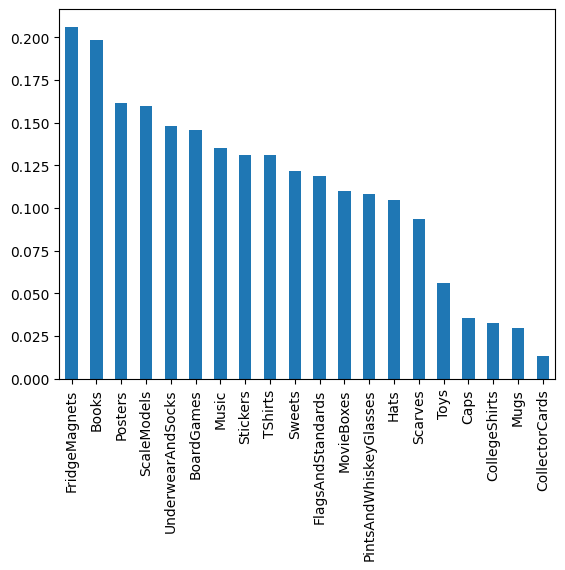

In [8]:
df_bool.mean().sort_values(ascending=False).plot(kind="bar")

### Eka versio mallista

In [9]:
#Compute items that sell at minimum in 0.001% of all orders placed in the month (min_support)
# frequent_itemsets = apriori(df_bool, min_support = 0.00000001,max_len = 2, use_colnames = True)
frequent_itemsets = apriori(df_bool, min_support = 0.1,max_len = 2, use_colnames = True)


In [10]:
print(frequent_itemsets.head())

   support      itemsets
0  0.10998  (MovieBoxes)
1  0.13098     (TShirts)
2  0.10459        (Hats)
3  0.13499       (Music)
4  0.16179     (Posters)


In [11]:
import mlxtend
print(mlxtend.__version__)

0.23.3


In [12]:
#Compute pairs of orders that have a meaningful lift of more than 1 in their sales when marketed together
frequent_itemsets_rules = association_rules(frequent_itemsets,metric = "lift", min_threshold = 1.0, num_itemsets=2)

In [13]:
frequent_itemsets_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(FlagsAndStandards),(Books),0.11880,0.19853,0.11145,0.938131,4.725388,1.0,0.087865,12.954372,0.894663,0.541335,0.922806,0.749754
1,(Books),(FlagsAndStandards),0.19853,0.11880,0.11145,0.561376,4.725388,1.0,0.087865,2.009011,0.983664,0.541335,0.502243,0.749754
2,(FridgeMagnets),(UnderwearAndSocks),0.20626,0.14798,0.13476,0.653350,4.415125,1.0,0.104238,2.457869,0.974508,0.613997,0.593144,0.782007
3,(UnderwearAndSocks),(FridgeMagnets),0.14798,0.20626,0.13476,0.910664,4.415125,1.0,0.104238,8.884845,0.907849,0.613997,0.887449,0.782007


In [14]:
frequent_itemsets_rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

In [15]:
# Sort the DataFrame by the 'lift' column in descending order
sorted_rules = frequent_itemsets_rules.sort_values(by='lift', ascending=False)

# Display the sorted DataFrame
# print(sorted_rules)
print(sorted_rules.to_string(index=False))

        antecedents         consequents  antecedent support  consequent support  support  confidence     lift  representativity  leverage  conviction  zhangs_metric  jaccard  certainty  kulczynski
(FlagsAndStandards)             (Books)             0.11880             0.19853  0.11145    0.938131 4.725388               1.0  0.087865   12.954372       0.894663 0.541335   0.922806    0.749754
            (Books) (FlagsAndStandards)             0.19853             0.11880  0.11145    0.561376 4.725388               1.0  0.087865    2.009011       0.983664 0.541335   0.502243    0.749754
    (FridgeMagnets) (UnderwearAndSocks)             0.20626             0.14798  0.13476    0.653350 4.415125               1.0  0.104238    2.457869       0.974508 0.613997   0.593144    0.782007
(UnderwearAndSocks)     (FridgeMagnets)             0.14798             0.20626  0.13476    0.910664 4.415125               1.0  0.104238    8.884845       0.907849 0.613997   0.887449    0.782007


### Toka versio mallista

In [16]:
# Step 1: Generate frequent itemsets with minimum support

frequent_itemsets2= apriori(df_bool, min_support=0.1, use_colnames=True) # Yleisesti high support >= 0.5, niche support < 0.5 (market basket aluksi esim. 0.1)

# Step 2: Generate rules with minimum confidence
rules = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.7, num_itemsets=2) # high confidence >= 0.7, low 0.3-0.6  (Yleensä aloitus 0.7)

# Step 3: Filter rules by lift
rules = rules[rules['lift'] > 1] #  yleiset rajat: lift >= 1.2, meaningful, lift >= strong relationship 
# Lift >= 1 - positive association
# Lift = 1 no associaton
# Lift < 1 negattive association

print(rules)



           antecedents      consequents  antecedent support  \
0  (FlagsAndStandards)          (Books)             0.11880   
1  (UnderwearAndSocks)  (FridgeMagnets)             0.14798   

   consequent support  support  confidence      lift  representativity  \
0             0.19853  0.11145    0.938131  4.725388               1.0   
1             0.20626  0.13476    0.910664  4.415125               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.087865   12.954372       0.894663  0.541335   0.922806    0.749754  
1  0.104238    8.884845       0.907849  0.613997   0.887449    0.782007  


In [17]:
# Sort the DataFrame by the 'lift' column in descending order
sorted_rules2 = rules.sort_values(by='lift', ascending=False)

# Display the sorted DataFrame
# print(sorted_rules)
print(sorted_rules.to_string(index=False))

        antecedents         consequents  antecedent support  consequent support  support  confidence     lift  representativity  leverage  conviction  zhangs_metric  jaccard  certainty  kulczynski
(FlagsAndStandards)             (Books)             0.11880             0.19853  0.11145    0.938131 4.725388               1.0  0.087865   12.954372       0.894663 0.541335   0.922806    0.749754
            (Books) (FlagsAndStandards)             0.19853             0.11880  0.11145    0.561376 4.725388               1.0  0.087865    2.009011       0.983664 0.541335   0.502243    0.749754
    (FridgeMagnets) (UnderwearAndSocks)             0.20626             0.14798  0.13476    0.653350 4.415125               1.0  0.104238    2.457869       0.974508 0.613997   0.593144    0.782007
(UnderwearAndSocks)     (FridgeMagnets)             0.14798             0.20626  0.13476    0.910664 4.415125               1.0  0.104238    8.884845       0.907849 0.613997   0.887449    0.782007
